In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sklearn
import mglearn
import warnings

warnings.filterwarnings('ignore') 
plt.style.use('classic')

In [53]:
#회귀 모델에서 R^2를 사용해 모델을 평가하는 일반적인 방법

In [54]:
from mglearn.datasets import make_blobs
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
X,y = make_blobs(random_state=0)

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=0)
log = LogisticRegression().fit(X_train, y_train)

print(f"test score : {log.score(X_test, y_test):0.3f}")

test score : 0.920


# 교차 검증

## K-겹 교차검증
### 데이터를 k개로 나눈다.
### 나눈 데이터 중 i번째 데이터를 j개의 데이터들을 통해 훈련시킨 뒤 평가한다. (j = 1~k 단 i!=j) 

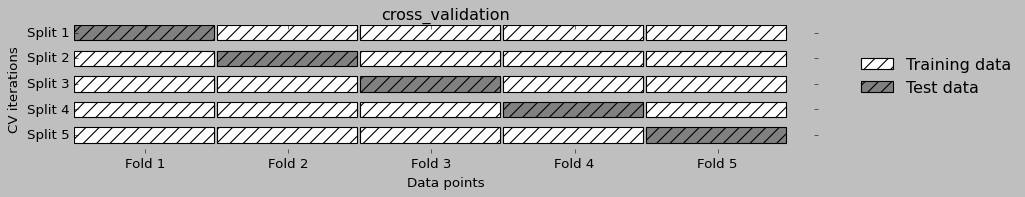

In [55]:
mglearn.plots.plot_cross_validation()

In [56]:
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression

data = load_iris()
log = LogisticRegression(max_iter=1000)

# default k = 5
score = cross_val_score(log, data.data, data.target)
print("교차 검증 점수 :", score)

# 10-k-겹 교차검증
score = cross_val_score(log, data.data, data.target, cv=10)
print("교차 검증 점수 :", score)

교차 검증 점수 : [0.96666667 1.         0.93333333 0.96666667 1.        ]
교차 검증 점수 : [1.         0.93333333 1.         1.         0.93333333 0.93333333
 0.93333333 1.         1.         1.        ]


In [57]:
# cross_validate는 훈련에 걸린시간, 테스트에 걸린 시간, 테스트 점수를 반환한다.
# cross_val_score 는 이중 test_score만 반환하는 것이다.

from sklearn.model_selection import cross_validate
res = cross_validate(log, data.data, data.target)
res

{'fit_time': array([0.00598907, 0.00563526, 0.00402188, 0.00525117, 0.00442982]),
 'score_time': array([2.06947327e-04, 1.29938126e-04, 8.60691071e-05, 1.54018402e-04,
        1.21116638e-04]),
 'test_score': array([0.96666667, 1.        , 0.93333333, 0.96666667, 1.        ])}

In [58]:
res_df = pd.DataFrame(res)
res_df.loc["mean"] = res_df.mean()
res_df


,fit_time,score_time,test_score
0,0.005989,0.000207,0.966667
1,0.005635,0.000130,1.000000
2,0.004022,0.000086,0.933333
3,0.005251,0.000154,0.966667
4,0.004430,0.000121,1.000000
mean,0.005065,0.000140,0.973333


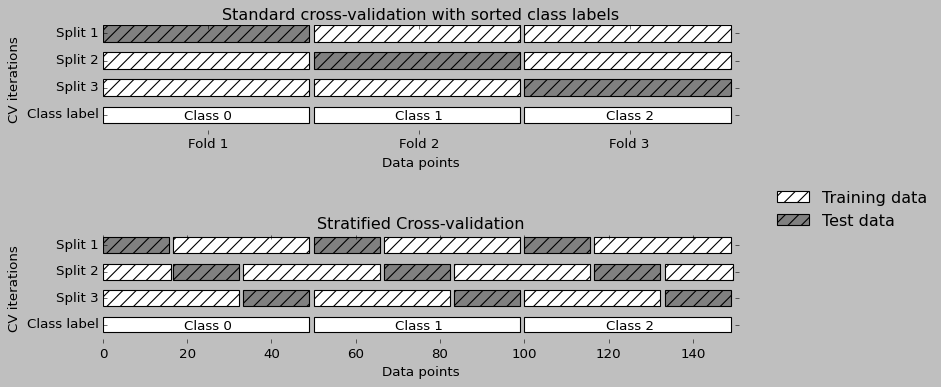

In [59]:
# 데이터에 순서가 존재하다면 단순 k-겹 교차검증은 바람직하지 못할 수 있다.
mglearn.plots.plot_stratified_cross_validation()

## 교차 검증 상세 옵션
### 데이터의 순서를 없애는 방법

In [60]:
# 데이터의 순서를 뒤죽박죽으로 만드는 방법
from sklearn.model_selection import KFold

# iris 데이터에는 순서가 존재하므로 교차검증 점수가 매우 좋지 않다.
kfold = KFold(n_splits=3)
print(cross_val_score(log, data.data, data.target, cv=kfold))

# 데이터를 무작위로 섞어서 순서를 없앤다.
kfold = KFold(n_splits=3, shuffle=True)
print(cross_val_score(log, data.data, data.target, cv=kfold))

[0. 0. 0.]
[0.98 0.96 0.94]


## LOOCV
### 큰 데이터에는 시간이 오래걸리지만 작은 데이터에는 이따금 유용하다.

In [61]:
from sklearn.model_selection import LeaveOneOut
loo = LeaveOneOut()

score = cross_val_score(log, data.data, data.target, cv=loo)
print("교차 검증 분할 수 : ", len(score))
print("교차 검증 점수 : ", score.mean())

교차 검증 분할 수 :  150
교차 검증 점수 :  0.9666666666666667


## 임의 분할 교차 검증
### n개의 포인트로 나눈 뒤 train_size 만큼 훈련 셋을 랜덤하게 선택하고 
### test_size 만큼 테스트 셋을 랜덤하게 선택한다. 이를 n_splits 만큼 반복한다.

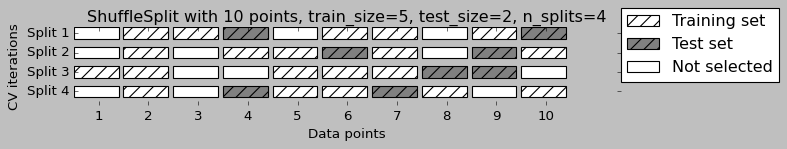

In [62]:
mglearn.plots.plot_shuffle_split()

In [64]:
# 테스트 셋과 훈련 셋의 크기를 미리 설장할 수 있기 때문에
# 대규모 데이터에서 일부 데이터만으로 훈련 성과를 평가하고 싶을 때 유용하다.

from sklearn.model_selection import ShuffleSplit
# train_size와 test_size 에 int 를 넣으면 셋의 절대 개수를,
# float 을 넣으면 train_size 와 test_size 의 비율을 나타낸다.
shuffleSplit = ShuffleSplit(n_splits=10, train_size=0.5, test_size=0.5)
score = cross_val_score(log, data.data, data.target, cv=shuffleSplit)

score

array([0.98666667, 0.97333333, 0.92      , 0.97333333, 0.97333333,
       0.94666667, 0.96      , 0.97333333, 0.94666667, 0.96      ])

## 그룹별 교차 검증
### 기존의 그룹으로 새로운 그룹을 평가하고 싶을 때

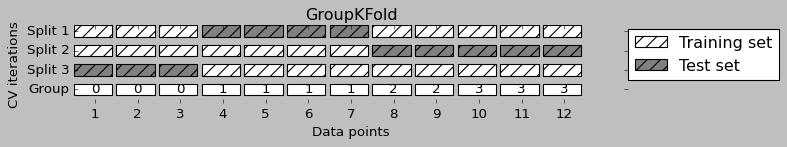

In [65]:
mglearn.plots.plot_group_kfold()

In [69]:
from sklearn.model_selection import GroupKFold
X,y = make_blobs(n_samples=12)

group = [0,0,0,0,1,1,1,1,2,2,2,2]

score = cross_val_score(log, X, y, groups=group, cv = GroupKFold(n_splits=3))

score

array([0.75, 0.5 , 1.  ])

## 반복 교차 검증
### k-겹 교차 검증을(k = n_splits - default=5) 를 n번(n = n_repeats - default=10) 반복한다.
### 회귀는 RepeatedKFold, 분류는 RepeatedStratifiedKFold 를 사용한다.

In [77]:
from sklearn.model_selection import RepeatedStratifiedKFold

rskfold = RepeatedStratifiedKFold()
score = cross_val_score(log, data.data, data.target, cv=rskfold)

print("교차 검증 점수 : \n", score)
print("교차 검증 점수 평균 : ", score.mean())



교차 검증 점수 : 
 [0.96666667 0.93333333 0.96666667 0.96666667 0.96666667 0.93333333
 0.96666667 1.         0.96666667 0.96666667 0.96666667 0.93333333
 1.         1.         0.9        1.         0.86666667 0.96666667
 0.96666667 0.96666667 0.96666667 1.         0.93333333 0.96666667
 0.96666667 1.         1.         0.9        0.93333333 1.
 0.96666667 0.96666667 1.         0.96666667 0.93333333 1.
 0.93333333 1.         0.93333333 0.96666667 0.96666667 1.
 0.96666667 0.96666667 0.96666667 0.96666667 0.96666667 0.96666667
 0.93333333 1.        ]
교차 검증 점수 평균 :  0.9646666666666667
